C:\Users\ishwa\AppData\Local\Temp\ipykernel_20596\4286493164.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Metric', y='Value', data=data, palette=['red', 'blue', 'green', 'gray'])


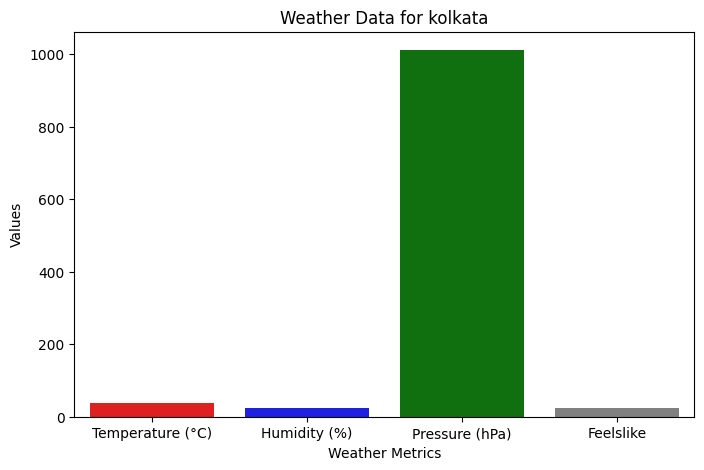

In [4]:
# IMPORTANT DEPENDENCIES
import requests    #pip install request 
import matplotlib.pyplot as plt  #Using Matplotlib
import seaborn as sns  #Using Seaborn
import pandas as pd    #Install panda From Library

#CONFIGURATION INFORMATION
def get_weather_data(city, api_key):
    url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={api_key}&units=metric"  #Weather API Key
    response = requests.get(url)
    if response.status_code == 200:
        return response.json()
    else:
        print("Error fetching data")
        return None

#GENERATE CITY FOR DAYA ANALYSIS 
def plot_weather_data(weather_data, city):
    if not weather_data:
        return

#SET UP LISTS TO HOLD RESPONSE INFORMATION
    temp = weather_data['main']['temp']  #Show temperature centigrade in Graph
    humidity = weather_data['main']['humidity']  #Show Humidity in percentage are present in weather
    pressure = weather_data['main']['pressure']  #Show Air pressure are present in weather graph
    feelslike = weather_data['main']['humidity'] #Show feelslike in graph

#PREPARE DATA FOE VISUALIZATION 
    data = pd.DataFrame({
        'Metric': ['Temperature (°C)', 'Humidity (%)', 'Pressure (hPa)', 'Feelslike'],
        'Value': [temp, humidity, pressure, feelslike]
    })


#PLOT DATA
    plt.figure(figsize=(8, 5))
    sns.barplot(x='Metric', y='Value', data=data, palette=['red', 'blue', 'green', 'gray'])
    plt.xlabel('Weather Metrics')
    plt.ylabel('Values')
    plt.title(f'Weather Data for {city}')
    plt.show()

if __name__ == "__main__":
    API_KEY = "7368a218203d2dab07c891aa24d4ad3e"  #OpenWeatherMap API key
    city_name = input("Enter city name: ")  #Enter city name which city weather you want to check
    weather = get_weather_data(city_name, API_KEY)
    plot_weather_data(weather, city_name)